In [32]:
import sys
sys.path.append('../')

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

from architectures.ResNet import *
from src.helpers import Device, train
from src.metrics import Accuracy

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
# parameters
RANDOM_SEED = 42
LEARNING_RATE = 0.01
BATCH_SIZE = 32
N_EPOCHS = 1

IMG_SIZE = 32
N_CLASSES = 10

In [43]:
# define transforms
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

In [44]:
# define transforms
# transforms = transforms.Compose([transforms.Resize((32, 32)), transforms.ToTensor()])

In [45]:
# download and create datasets
train_dataset = datasets.CIFAR10(root='./cifar10_data', 
                               train=True, 
                               transform=transform_train,
                               download=True)

valid_dataset = datasets.CIFAR10(root='./cifar10_data', 
                               train=False, 
                               transform=transform_test)

Files already downloaded and verified


In [46]:
# define the data loaders
train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=BATCH_SIZE, 
                          shuffle=True,num_workers=5)

valid_loader = DataLoader(dataset=valid_dataset, 
                          batch_size=1100*BATCH_SIZE, 
                          shuffle=False,num_workers=5)

In [47]:
batch, y = next(iter(valid_loader))
batch.shape

torch.Size([10000, 3, 32, 32])

In [50]:
def imshow(inp, title=None):

    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.5])
    std = np.array([0.5])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

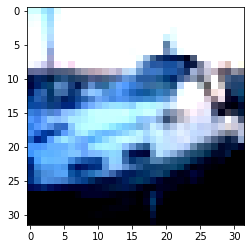

In [51]:
imshow(batch[2])

# Training

In [55]:
torch.manual_seed(RANDOM_SEED)
device = Device().get()
model = resnet18(3, N_CLASSES).to(device)

In [56]:
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.CrossEntropyLoss()

In [ ]:
model, optimizer, metrics = train(model, criterion, optimizer, train_loader, valid_loader, 2, device, eval_metrics=[Accuracy()])

21:38:11 --- Epoch: 0	Train loss: 1.8386	Valid loss: 1.4240	Accuracy: 0.4406	Validation Accuracy: 0.4620


../src/helpers.py:45: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


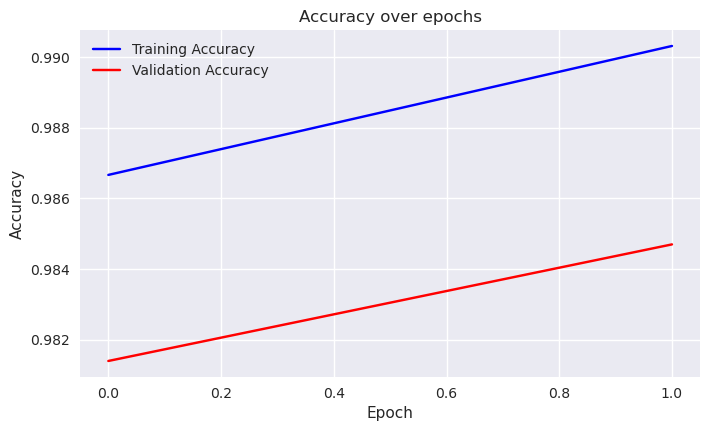

In [47]:
metrics['Accuracy'].plot()